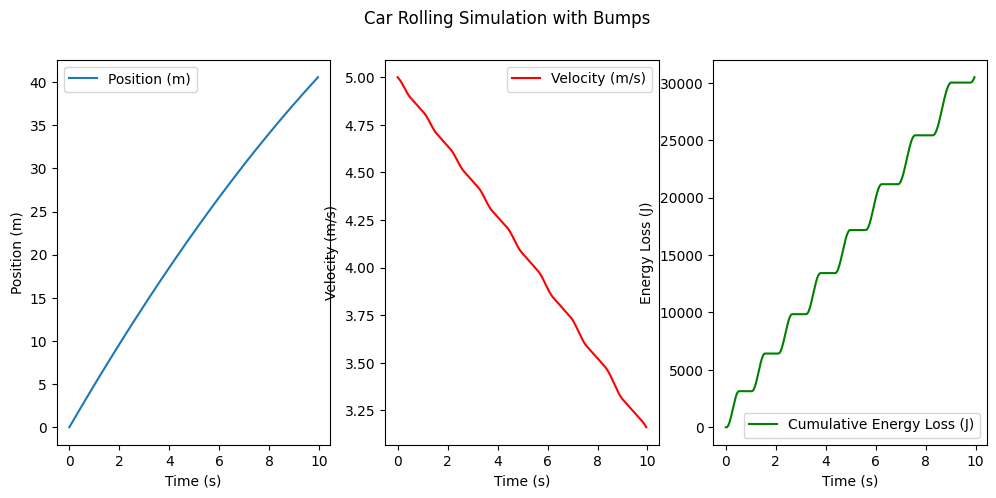

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class CarSimulation:
    def __init__(self, mass, wheel_radius, wheel_firmness, surface_resistance, initial_velocity=5):
        self.mass = mass  # kg
        self.wheel_radius = wheel_radius  # meters
        self.wheel_firmness = wheel_firmness  # 0 (soft) to 1 (hard)
        self.surface_resistance = surface_resistance  # Roughness coefficient
        self.velocity = initial_velocity  # m/s
        self.position = 0  # m
        self.dt = 0.05  # Time step in seconds
        self.gravity = 9.81  # m/s²
        self.energy_lost = 0  # Track energy loss
        self.bump_size = 0.1  # Maximum bump height

    def bump_profile(self, x):
        """ Defines the height of bumps as a sinusoidal function (or randomized bumps). """
        return self.bump_size * np.sin(2 * np.pi * x / 5)  # Bumps every 5 meters

    def rolling_resistance_force(self):
        """ Rolling resistance based on wheel firmness and surface roughness """
        base_resistance = 0.01 * self.mass * self.gravity  # Approximate rolling resistance force
        compliance_factor = (1 - self.wheel_firmness) * 5  # More compliance -> More resistance
        return base_resistance * (1 + self.surface_resistance * compliance_factor)

    def bump_energy_loss(self):
        """ Calculate energy lost when the wheel collides with a bump """
        bump_height = self.bump_profile(self.position)
        if bump_height > 0:  # Only apply energy loss if a bump is present
            impact_force = self.mass * self.gravity * (1 - self.wheel_firmness)
            energy_lost = impact_force * bump_height  # Work done against the bump
            self.energy_lost += energy_lost
            return energy_lost / (self.mass * self.velocity + 1e-6)  # Convert to deceleration
        return 0

    def update(self):
        """ Simulates one time step with bump collisions """
        force_resistance = self.rolling_resistance_force()
        bump_deceleration = self.bump_energy_loss()
        
        # Total acceleration (negative because it's slowing down)
        acceleration = -force_resistance / self.mass - bump_deceleration
        self.velocity += acceleration * self.dt
        self.position += self.velocity * self.dt

        # If the bump is high enough, simulate lift-off of front wheels
        if self.bump_profile(self.position) > self.wheel_radius / 2:
            self.velocity *= 0.95  # Lose more speed due to lift-off

        if self.velocity < 0:
            self.velocity = 0  # Stop at zero velocity

    def simulate(self, time_duration=10):
        """ Runs the simulation for a given duration """
        time_steps = int(time_duration / self.dt)
        positions, velocities, times, energy_losses = [], [], [], []

        for t in range(time_steps):
            positions.append(self.position)
            velocities.append(self.velocity)
            times.append(t * self.dt)
            energy_losses.append(self.energy_lost)
            self.update()

        return times, positions, velocities, energy_losses

# Simulation Parameters
car_mass = 1000  # kg
wheel_radius = 0.3  # meters
wheel_firmness = 0.5  # 0 (soft rubber) to 1 (hard plastic)
surface_resistance = 0.2  # Roughness coefficient

car = CarSimulation(car_mass, wheel_radius, wheel_firmness, surface_resistance)
times, positions, velocities, energy_losses = car.simulate()

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(times, positions, label="Position (m)")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(times, velocities, label="Velocity (m/s)", color='r')
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(times, energy_losses, label="Cumulative Energy Loss (J)", color='g')
plt.xlabel("Time (s)")
plt.ylabel("Energy Loss (J)")
plt.legend()

plt.suptitle("Car Rolling Simulation with Bumps")
plt.show()


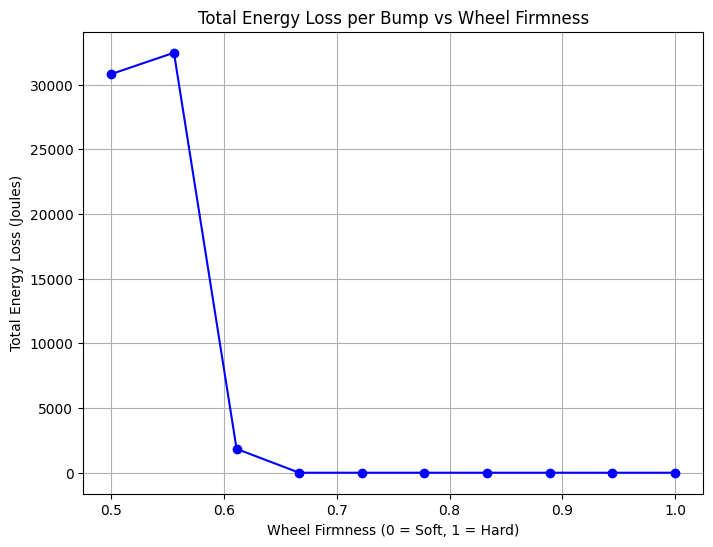

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class CarSimulation:
    def __init__(self, mass, wheel_radius, surface_resistance, initial_velocity=5):
        self.mass = mass  # kg
        self.wheel_radius = wheel_radius  # meters
        self.surface_resistance = surface_resistance  # Roughness coefficient
        self.velocity = initial_velocity  # m/s
        self.position = 0  # m
        self.dt = 0.05  # Time step in seconds
        self.gravity = 9.81  # m/s²
        self.energy_lost = 0  # Track energy loss
        self.bump_size = 0.1  # Maximum bump height

    def bump_profile(self, x):
        """ Defines the height of bumps as a sinusoidal function (or randomized bumps). """
        return self.bump_size * np.sin(2 * np.pi * x / 5)  # Bumps every 5 meters

    def rolling_resistance_force(self, wheel_firmness):
        """ Rolling resistance based on wheel firmness and surface roughness """
        base_resistance = 0.01 * self.mass * self.gravity  # Approximate rolling resistance force
        compliance_factor = (1 - wheel_firmness) * 5  # More compliance -> More resistance
        return base_resistance * (1 + self.surface_resistance * compliance_factor)

    def bump_energy_loss(self, wheel_firmness):
        """ Calculate energy lost when the wheel collides with a bump """
        bump_height = self.bump_profile(self.position)
        if bump_height > 0:  # Only apply energy loss if a bump is present
            impact_force = self.mass * self.gravity * (1 - wheel_firmness)
            energy_lost = impact_force * bump_height  # Work done against the bump
            self.energy_lost += energy_lost
            return energy_lost / (self.mass * self.velocity + 1e-6)  # Convert to deceleration
        return 0

    def update(self, wheel_firmness):
        """ Simulates one time step with bump collisions """
        force_resistance = self.rolling_resistance_force(wheel_firmness)
        bump_deceleration = self.bump_energy_loss(wheel_firmness)
        
        # Total acceleration (negative because it's slowing down)
        acceleration = -force_resistance / self.mass - bump_deceleration
        self.velocity += acceleration * self.dt
        self.position += self.velocity * self.dt

        # If the bump is high enough, simulate lift-off of front wheels
        if self.bump_profile(self.position) > self.wheel_radius / 2:
            self.velocity *= 0.95  # Lose more speed due to lift-off

        if self.velocity < 0:
            self.velocity = 0  # Stop at zero velocity

    def simulate(self, wheel_firmness, time_duration=10):
        """ Runs the simulation for a given duration and calculates total energy loss """
        time_steps = int(time_duration / self.dt)
        self.energy_lost = 0  # Reset energy loss for each run

        for t in range(time_steps):
            self.update(wheel_firmness)

        return self.energy_lost

# Simulation Parameters
car_mass = 1000  # kg
wheel_radius = 0.3  # meters
surface_resistance = 0.2  # Roughness coefficient

# Varying firmness values for the simulation
firmness_values = np.linspace(0.5, 1.0, 10)
energy_losses = []

car = CarSimulation(car_mass, wheel_radius, surface_resistance)

# Simulate for each wheel firmness and calculate the total energy loss
for firmness in firmness_values:
    energy_loss = car.simulate(firmness)
    energy_losses.append(energy_loss)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(firmness_values, energy_losses, marker='o', linestyle='-', color='b')
plt.title("Total Energy Loss per Bump vs Wheel Firmness")
plt.xlabel("Wheel Firmness (0 = Soft, 1 = Hard)")
plt.ylabel("Total Energy Loss (Joules)")
plt.grid(True)
plt.show()
